In [25]:
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
import numpy as np
from keras import backend as k
import matplotlib.pyplot as plt

In [26]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
# import matplotlib.pyplot as plt
# fig = plt.figure()

# for i in range(9):
#   plt.subplot(3,3,i+1)
#   plt.tight_layout()
#   plt.imshow(X_train[i],
#              cmap='gray',interpolation='none')
#   plt.title('Digits {}'.format(y_train[i]))
#   plt.xticks([])
#   plt.yticks([])

In [30]:
print('X_train shape', x_train.shape)
print('Y_train shape', y_train.shape)
print('X_test shape', x_test.shape)
print('Y_test shape', y_test.shape)

X_train shape (60000, 28, 28)
Y_train shape (60000,)
X_test shape (10000, 28, 28)
Y_test shape (10000,)


In [31]:
num_classes = 10
input_shape= (28,28,1)

In [32]:
#Reshape

In [33]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [34]:
#images have shape of (28,28,1)

In [35]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [36]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [37]:
#convert class vectors to binary class metrics

In [38]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [39]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [40]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
#Build the model

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape= input_shape))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [45]:
#Train the model

In [46]:
batch_siz = 128
num_epoch = 10

In [47]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [48]:
model_log = model.fit(x_train,y_train,
                      batch_size=batch_siz,
                      epochs= num_epoch,
                      verbose=1,
                      validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 72s 154ms/step - loss: 2.2788 - accuracy: 0.1434 - val_loss: 2.2440 - val_accuracy: 0.3665
Epoch 2/10
469/469 [==============================] - 73s 156ms/step - loss: 2.2235 - accuracy: 0.2476 - val_loss: 2.1752 - val_accuracy: 0.5209
Epoch 3/10
469/469 [==============================] - 72s 153ms/step - loss: 2.1517 - accuracy: 0.3462 - val_loss: 2.0828 - val_accuracy: 0.6082
Epoch 4/10
469/469 [==============================] - 72s 153ms/step - loss: 2.0526 - accuracy: 0.4359 - val_loss: 1.9568 - val_accuracy: 0.6793
Epoch 5/10
469/469 [==============================] - 72s 153ms/step - loss: 1.9255 - accuracy: 0.5036 - val_loss: 1.7937 - val_accuracy: 0.7192
Epoch 6/10
469/469 [==============================] - 76s 161ms/step - loss: 1.7653 - accuracy: 0.5602 - val_loss: 1.5992 - val_accuracy: 0.7494
Epoch 7/10
469/469 [==============================] - 72s 155ms/step - loss: 1.5928 - accuracy: 0.6005 - val_loss: 1.3939 - val_ac

In [49]:
score= model.evaluate(x_test,y_test,verbose= 0)

print('Test Loss' , score[0])
print('Test accuracy' , score[1])

Test Loss 0.9191672801971436
Test accuracy 0.8145999908447266


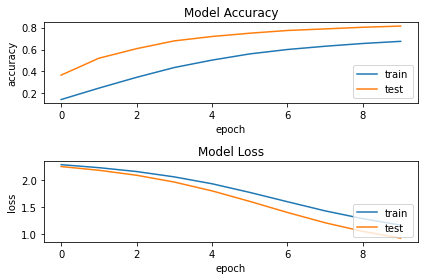

In [50]:
import os

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train','test'],loc='lower right')


plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')
plt.tight_layout()